# **Import Library**

In [1]:
import keras
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import LearningRateScheduler

In [2]:
print(tf.__version__)
print(keras.__version__)

2.18.0
3.7.0


# **Import Dataset**

In [3]:
# Load all dataset to Pandas DataFrame
user_df = pd.read_csv("../Dataset/old_users_data_with_links.csv", sep=';')
tourism_df = pd.read_csv("../Dataset/new_tourism_with_id_links_3.csv")
rating_df = pd.read_csv("../Dataset/new_tourism_rating_comments.csv")

In [4]:
print("old_users_data.csv"),               display(user_df.sample(3)),     print("\n")
print("new_tourism_rating_comments.csv"),  display(rating_df.sample(3)),   print("\n")
print("new_tourism_with_id_links.csv"),    display(tourism_df.sample(3))

old_users_data.csv


,User_Id,Full_Name,Age,Email,Password,Img_Path
157,158,Lorie Dressel,23,ldressel4d@opera.com,hW0\ec#n0F4Y(i?,User\ProfilePicture (158).jpg
162,163,Ase Izhakov,40,aizhakov4i@dailymail.co.uk,"aP0""'Kc|z",User\ProfilePicture (163).jpg
286,287,Babb Horwell,27,bhorwell7y@uiuc.edu,tK2>ba>yZ1PI7q},User\ProfilePicture (181).jpg




new_tourism_rating_comments.csv


,User_Id,Place_Id,Place_Ratings,Comment
6568,205,298,2,"Sebenarnya bisa jadi tempat bagus, tapi Gunung..."
9385,294,43,1,"Udah gak bakal balik lagi ke The Escape Hunt, ..."
9512,298,159,1,"Pengalaman terburuk liburan kali ini, terutama..."




new_tourism_with_id_links.csv


,Place_Id,Place_Name,Category,Description,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Img_Path_0,Img_Path_1,Img_Path_2
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Taman Mini Indonesia Indah merupakan suatu kaw...,Jakarta,10000,"4,5",NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,images_output\Taman Mini Indonesia Indah (TMII...,images_output\Taman Mini Indonesia Indah (TMII...,images_output\Taman Mini Indonesia Indah (TMII...
1,2,Kota Tua,Budaya,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Jakarta,0,"4,6",90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,images_output\Kota Tua\Kota Tua_0.jpg,images_output\Kota Tua\Kota Tua_1.jpg,NaN
96,97,Monumen Yogya Kembali,"Budaya, Situs Sejarah",Museum Monumen Yogya Kembali (bahasa Jawa: ꦩꦺꦴ...,Yogyakarta,15000,"4,5",30.0,"{'lat': -7.7495904, 'lng': 110.3696068}",-7.749590,110.369607,images_output\Monumen Yogya Kembali\Monumen Yo...,images_output\Monumen Yogya Kembali\Monumen Yo...,NaN


(None, None)

# **Data Assessment**


## **`user_df`**

In [5]:
user_df.sample(5)

,User_Id,Full_Name,Age,Email,Password,Img_Path
194,195,Redford Lobe,29,rlobe5e@livejournal.com,oA6/@5>wI+,User\ProfilePicture (181).jpg
260,261,Theadora Swinbourne,38,tswinbourne78@bizjournals.com,pH4<ks)4$zln,User\ProfilePicture (181).jpg
164,165,Harwilll Edensor,23,hedensor4k@bluehost.com,"qY9,YUxJW",User\ProfilePicture (165).jpg
152,153,Staci Champley,39,schampley48@taobao.com,fY2\o10@\?KIa,User\ProfilePicture (153).jpg
120,121,Modestine Batey,35,mbatey3c@dedecms.com,tV7|}t6#b,User\ProfilePicture (121).jpg


In [6]:
# View variable information in users data
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User_Id    300 non-null    int64 
 1   Full_Name  300 non-null    object
 2   Age        300 non-null    int64 
 3   Email      300 non-null    object
 4   Password   300 non-null    object
 5   Img_Path   300 non-null    object
dtypes: int64(2), object(4)
memory usage: 14.2+ KB


In [7]:
# View the number of unique data in each users data variable
print("Number of unique data:")
print(user_df.nunique())

Number of unique data:
User_Id      300
Full_Name    300
Age           23
Email        300
Password     300
Img_Path     181
dtype: int64


In [8]:
# See the number of empty data in each users data variable
print("Number of empty data:")
print(user_df.isna().sum())

Number of empty data:
User_Id      0
Full_Name    0
Age          0
Email        0
Password     0
Img_Path     0
dtype: int64


In [9]:
# View the number of duplicate data in each row of seller data
print("Number of duplicate rows:", end=" ")
print(user_df.duplicated().sum())

Number of duplicate rows: 0


In [10]:
# View descriptive parameter data from each numeric variable of seller data
user_df.describe()

,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


## **`tourism_df`**

In [11]:
tourism_df.sample(3)

,Place_Id,Place_Name,Category,Description,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Img_Path_0,Img_Path_1,Img_Path_2
116,117,The World Landmarks - Merapi Park Yogyakarta,"Taman Hiburan, Cagar Alam",Merapi Park merupakan salah satu tempat wisata...,Yogyakarta,22000,"4,2",90.0,"{'lat': -7.620904599999999, 'lng': 110.4216275}",-7.620905,110.421627,images_output\The World Landmarks - Merapi Par...,NaN,NaN
412,413,Museum TNI AL Loka Jala Crana,Budaya,Museum Loka Jala Crana berdiri pada tanggal 19...,Surabaya,2000,"4,5",NaN,"{'lat': -7.227185, 'lng': 112.718997}",-7.227185,112.718997,images_output\Museum TNI AL Loka Jala Crana\Mu...,images_output\Museum TNI AL Loka Jala Crana\Mu...,NaN
29,30,Taman Menteng,Taman Hiburan,Taman Menteng adalah sebuah taman yang berloka...,Jakarta,0,"4,5",NaN,"{'lat': -6.1964087, 'lng': 106.8293106}",-6.196409,106.829311,images_output\Taman Menteng\Taman Menteng_0.jpg,images_output\Taman Menteng\Taman Menteng_1.png,images_output\Taman Menteng\Taman Menteng_2.png


In [12]:
# View variable information in tourism data
tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Category      437 non-null    object 
 3   Description   437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    object 
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Img_Path_0    437 non-null    object 
 12  Img_Path_1    358 non-null    object 
 13  Img_Path_2    166 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 47.9+ KB


In [13]:
# View the number of unique data in each tourism data variable
print("Number of unique data:")
print(tourism_df.nunique())

Number of unique data:
Place_Id        437
Place_Name      437
Category         26
Description     437
City              5
Price            50
Rating           14
Time_Minutes     15
Coordinate      437
Lat             437
Long            437
Img_Path_0      432
Img_Path_1      353
Img_Path_2      164
dtype: int64


In [14]:
# See the number of empty data in each tourism data variable
print("Number of empty data:")
print(tourism_df.isna().sum())

Number of empty data:
Place_Id          0
Place_Name        0
Category          0
Description       0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Img_Path_0        0
Img_Path_1       79
Img_Path_2      271
dtype: int64


In [15]:
# View the number of duplicate data in each row of tourism data
print("Number of duplicate rows:", end=" ")
print(tourism_df.duplicated().sum())

Number of duplicate rows: 0


In [16]:
# View all unique categories
categories_set = set()
for data in tourism_df['Category'].tolist():
  categories = data.split(', ')
  for category in categories:
    categories_set.add(category)

print(f'Number of categories: {len(categories_set)}')
for index, data in enumerate(categories_set):
  print(index, data)

Number of categories: 9
0 Cagar Alam
1 Taman Hiburan
2 Kebun Binatang
3 Budaya
4 Situs Sejarah
5 Bahari
6 Teater & Pertunjukan
7 Pusat Perbelanjaan
8 Tempat Ibadah


In [17]:
# View descriptive parameter data of each numeric variable of customer data
tourism_df.describe()

,Place_Id,Price,Time_Minutes,Lat,Long
count,437.000000,437.000000,205.000000,437.000000,437.000000
mean,219.000000,24652.173913,82.609756,-7.095438,109.160142
std,126.295289,66446.374709,52.872339,0.727241,1.962848
min,1.000000,0.000000,10.000000,-8.197894,103.931398
25%,110.000000,0.000000,45.000000,-7.749590,107.578369
50%,219.000000,5000.000000,60.000000,-7.020524,110.237468
75%,328.000000,20000.000000,120.000000,-6.829411,110.431869
max,437.000000,900000.000000,360.000000,1.078880,112.821662


## **`rating_df`**

In [18]:
rating_df.sample(3)

,User_Id,Place_Id,Place_Ratings,Comment
2260,72,364,2,Water Blaster Bukit Candi Golf tuh lokasinya b...
3706,118,436,5,"Suasananya enak, pemandangannya cakep banget d..."
6996,219,431,3,Taman Hiburan Rakyat rasanya agak kurang grege...


In [19]:
# View variable information in rating data
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9597 entries, 0 to 9596
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User_Id        9597 non-null   int64 
 1   Place_Id       9597 non-null   int64 
 2   Place_Ratings  9597 non-null   int64 
 3   Comment        9597 non-null   object
dtypes: int64(3), object(1)
memory usage: 300.0+ KB


In [20]:
# View the number of unique data in each rating data variable
print("Number of unique data:")
print(rating_df.nunique())

Number of unique data:
User_Id           300
Place_Id          437
Place_Ratings       5
Comment          7118
dtype: int64


In [21]:
# See the number of empty data in each rating data variable
print("Number of empty data:")
print(rating_df.isna().sum())

Number of empty data:
User_Id          0
Place_Id         0
Place_Ratings    0
Comment          0
dtype: int64


In [22]:
# View the number of duplicate data in each row of rating data
print("Number of duplicate rows:", end=" ")
print(rating_df.duplicated().sum())

Number of duplicate rows: 0


In [23]:
# View descriptive parameter data of each numeric variable of rating data
rating_df.describe()

,User_Id,Place_Id,Place_Ratings
count,9597.000000,9597.000000,9597.000000
mean,151.046681,219.356049,3.066688
std,86.141501,126.126850,1.381008
min,1.000000,1.000000,1.000000
25%,76.000000,109.000000,2.000000
50%,150.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


# **Data Cleaning**

## **`user_df`**

In [24]:
# Only keep necessary columns
user_df = user_df[['User_Id', 'Full_Name', 'Age']].copy()
user_df.head(3)

,User_Id,Full_Name,Age
0,1,Corey Bloxsom,20
1,2,Koo Houtby,21
2,3,Haydon Coldrick,23


## **`tourism_df`**

In [25]:
# Only keep necessary columns
columns = ['Place_Id', 'Place_Name', 'Category', 'City', 'Price', 'Rating', 'Time_Minutes']
tourism_df = tourism_df[columns].copy()
tourism_df.head(3)

,Place_Id,Place_Name,Category,City,Price,Rating,Time_Minutes
0,1,Monumen Nasional,"Budaya, Situs Sejarah",Jakarta,20000,"4,6",15.0
1,2,Kota Tua,Budaya,Jakarta,0,"4,6",90.0
2,3,Dunia Fantasi,"Taman Hiburan, Bahari",Jakarta,270000,"4,6",360.0


In [26]:
# Convert Rating columns with commas to proper float format
tourism_df['Rating'] = tourism_df['Rating'].replace(',', '.', regex=True)
tourism_df['Rating'] = tourism_df['Rating'].astype(dtype='float64')
tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Category      437 non-null    object 
 3   City          437 non-null    object 
 4   Price         437 non-null    int64  
 5   Rating        437 non-null    float64
 6   Time_Minutes  205 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 24.0+ KB


In [27]:
# Fill missing Time_Minutes with the median
tourism_df.fillna({'Time_Minutes': tourism_df['Time_Minutes'].median()}, inplace=True)

## **`rating_df`**

In [28]:
# Only keep necessary columns
rating_df = rating_df[['User_Id', 'Place_Id', 'Place_Ratings']].copy()
rating_df.head(3)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5


# **Explanatory Data Analysis**

## **`user_df`**

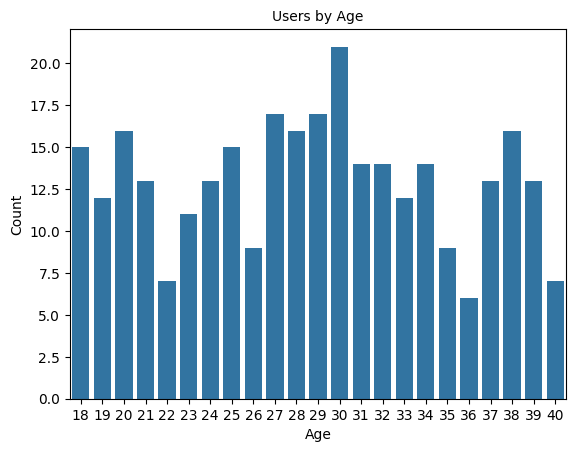

In [29]:
# View the distribution of user based on age
users_age_df = pd.DataFrame(user_df.groupby(by='Age')['User_Id'].nunique())
users_age_df.reset_index(inplace=True)
users_age_df.rename(columns={'User_Id': 'Count'}, inplace=True)

# Visualize the distribution of user based on age
sns.barplot(x='Age', y='Count', data=users_age_df.sort_values(by='Age', ascending=True))
plt.title('Users by Age', loc='center', fontsize=10)
plt.show()

## **`tourism_df`**

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'Time_Minutes'}>, <Axes: >]], dtype=object)

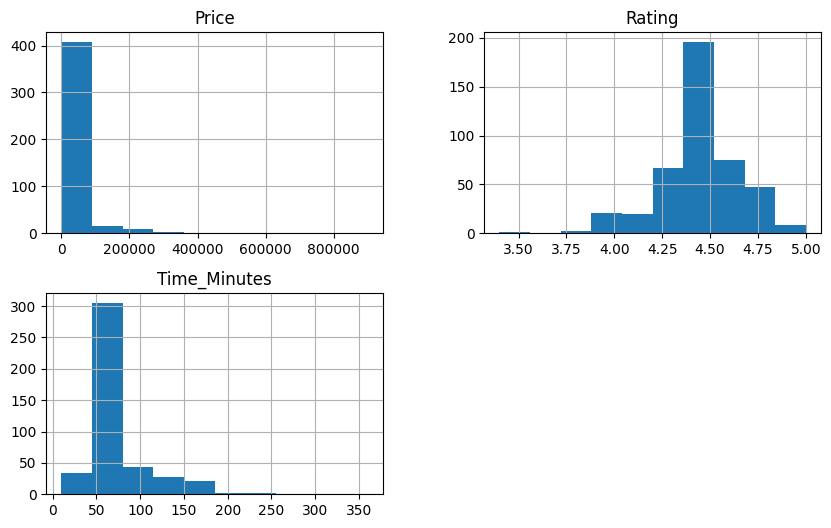

In [30]:
# View the distribution of numeric values
tourism_df[['Price', 'Rating', 'Time_Minutes']].hist(figsize=(10, 6))

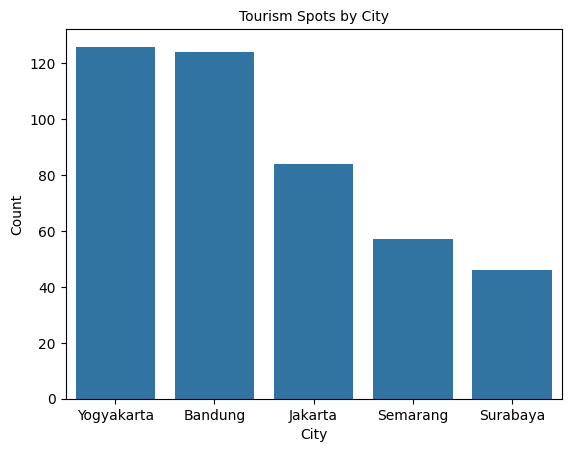

In [31]:
# View the distribution of tourism spots based on city
tourism_city_df = pd.DataFrame(tourism_df.groupby(by='City')['Place_Id'].nunique())
tourism_city_df.reset_index(inplace=True)
tourism_city_df.rename(columns={'Place_Id': 'Count'}, inplace=True)

# Visualize the distribution of tourism spots based on city
sns.barplot(x="City", y="Count", data=tourism_city_df.sort_values(by="Count", ascending=False))
plt.title("Tourism Spots by City", loc="center", fontsize=10)
plt.show()

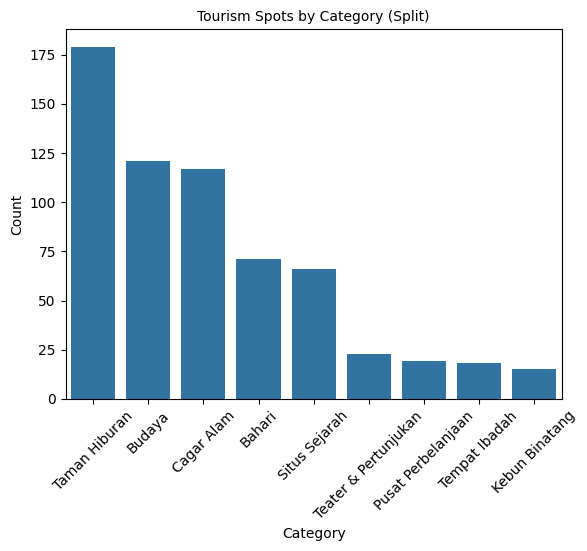

In [32]:
# View the distribution of tourism spots based on category
tourism_category_df = tourism_df.copy()
tourism_category_df['Category'] = tourism_category_df['Category'].str.split(', ')
tourism_category_df = tourism_category_df.explode('Category').groupby('Category').size().reset_index(name='Count')

# Visualize the distribution of tourism spots based on category
sns.barplot(x="Category", y="Count", data=tourism_category_df.sort_values(by="Count", ascending=False))
plt.title("Tourism Spots by Category (Split)", loc="center", fontsize=10)
plt.xticks(rotation=45)
plt.show()

## **`rating_df`**

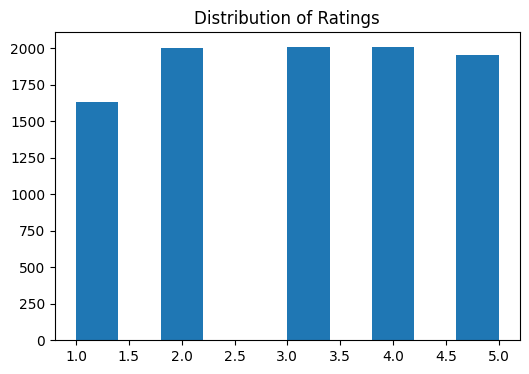

In [33]:
# View the distribution of user ratings
plt.figure(figsize=(6, 4))
plt.hist(rating_df['Place_Ratings'])
plt.title("Distribution of Ratings")
plt.show()

# **Data Transformation**

## **Create `tourism_one_hot_df`**

In [34]:
def get_one_hot_tourism_data(tourism_df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
  """
  Preprocess the tourism dataframe by applying one-hot encoding to 'Category' and 'City',
  and dropping irrelevant columns.

  Args:
      tourism_df (pd.DataFrame): Original tourism dataframe.

  Returns:
      pd.DataFrame: Processed tourism dataframe with one-hot encoding applied.
  """
  # One-hot encoding for Category and City columns
  categories_one_hot = tourism_df['Category'].str.get_dummies(sep=', ')
  country_one_hot = tourism_df['City'].str.get_dummies()

  # Merge the original dataframe with the one-hot encoding result
  new_tourism_df = pd.concat([tourism_df, country_one_hot, categories_one_hot], axis=1)

  # Drop irrelevant columns
  tourism_one_hot_df = new_tourism_df.drop(columns=['Place_Name', 'Category', 'City'])

  return tourism_one_hot_df, new_tourism_df

In [35]:
# Create tourism_one_hot_df
tourism_one_hot_df, new_tourism_df = get_one_hot_tourism_data(tourism_df)
display(tourism_one_hot_df)
display(tourism_one_hot_df.info())

,Place_Id,Price,Rating,Time_Minutes,Bandung,Jakarta,Semarang,Surabaya,Yogyakarta,Bahari,Budaya,Cagar Alam,Kebun Binatang,Pusat Perbelanjaan,Situs Sejarah,Taman Hiburan,Teater & Pertunjukan,Tempat Ibadah
0,1,20000,4.6,15.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,2,0,4.6,90.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,3,270000,4.6,360.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
3,4,10000,4.5,60.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,5,94000,4.5,60.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,2000,4.4,45.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
433,434,0,4.6,60.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
434,435,0,4.4,45.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
435,436,0,4.6,60.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Place_Id              437 non-null    int64  
 1   Price                 437 non-null    int64  
 2   Rating                437 non-null    float64
 3   Time_Minutes          437 non-null    float64
 4   Bandung               437 non-null    int64  
 5   Jakarta               437 non-null    int64  
 6   Semarang              437 non-null    int64  
 7   Surabaya              437 non-null    int64  
 8   Yogyakarta            437 non-null    int64  
 9   Bahari                437 non-null    int64  
 10  Budaya                437 non-null    int64  
 11  Cagar Alam            437 non-null    int64  
 12  Kebun Binatang        437 non-null    int64  
 13  Pusat Perbelanjaan    437 non-null    int64  
 14  Situs Sejarah         437 non-null    int64  
 15  Taman Hiburan         4

None

In [36]:
new_tourism_df.head(3)

,Place_Id,Place_Name,Category,City,Price,Rating,Time_Minutes,Bandung,Jakarta,Semarang,...,Yogyakarta,Bahari,Budaya,Cagar Alam,Kebun Binatang,Pusat Perbelanjaan,Situs Sejarah,Taman Hiburan,Teater & Pertunjukan,Tempat Ibadah
0,1,Monumen Nasional,"Budaya, Situs Sejarah",Jakarta,20000,4.6,15.0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,2,Kota Tua,Budaya,Jakarta,0,4.6,90.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,3,Dunia Fantasi,"Taman Hiburan, Bahari",Jakarta,270000,4.6,360.0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [37]:
# Save for testing
np.save('tourism_vector.npy', tourism_one_hot_df.to_numpy()[:, 1:])

## **Create `average_user_rating_df`**

In [38]:
def get_average_user_rating(new_tourism_df: pd.DataFrame, rating_df: pd.DataFrame) -> pd.DataFrame:
  """
  Calculate the average user ratings for tourism categories.

  This function preprocesses the tourism and rating dataframes to calculate
  the average ratings given by each user for various tourism categories.

  Args:
    new_tourism_df (pd.DataFrame): Dataframe containing tourism place
        information. It must include a 'Place_Id' column and one-hot
        encoded columns for tourism categories.
    rating_df (pd.DataFrame): Dataframe containing user ratings for places
      with columns 'Place_Id', 'User_Id', and 'Place_Ratings'.

  Returns:
    pd.DataFrame: A dataframe with average user ratings for each tourism
      category. The resulting dataframe includes:
        - 'User_Id': Unique identifier for users.
        - Columns corresponding to tourism categories with average ratings
          for each user.
    """

  # Category list
  categories = [
    'Bahari', 'Budaya', 'Cagar Alam', 'Kebun Binatang', 'Pusat Perbelanjaan',
    'Situs Sejarah' , 'Taman Hiburan', 'Teater & Pertunjukan', 'Tempat Ibadah'
  ]

  # Drop unnecessary columns from new_tourism_df
  tourism_category_only_one_hot_df = new_tourism_df.drop(columns=[
    'Place_Name', 'Category', 'City', 'Price', 'Rating', 'Time_Minutes',
    'Bandung', 'Jakarta', 'Semarang', 'Surabaya', 'Yogyakarta'
  ])

  # Merge rating_df with tourism_category_only_one_hot_df based on 'Place_Id'
  rating_one_hot_df = rating_df.merge(
      tourism_category_only_one_hot_df, how='inner', on='Place_Id'
  )

  # Copy rating_one_hot_df for calculation
  rating_not_one_hot_df = rating_one_hot_df.copy()

  # Multiply the rating by each category to get a weighted score.
  for category in categories:
    rating_not_one_hot_df[category] *= rating_not_one_hot_df['Place_Ratings']

  # Calculate total ratings and number of ratings per category per user
  total_count = rating_one_hot_df.groupby('User_Id')[categories].sum()
  total_rating = rating_not_one_hot_df.groupby('User_Id')[categories].sum()

  # Average rating for each category
  average_ratings = (total_rating / total_count)
  average_ratings = round(average_ratings, 1)
  average_ratings = average_ratings.fillna(0).reset_index()

  # Add User_Id column to the final result
  average_user_rating_df = pd.concat([total_count.reset_index()[['User_Id']],
                                      average_ratings[categories]], axis=1)

  return average_user_rating_df

In [39]:
# Create average_user_rating_df
average_user_rating_df = get_average_user_rating(new_tourism_df, rating_df)
display(average_user_rating_df)
display(average_user_rating_df.info())

,User_Id,Bahari,Budaya,Cagar Alam,Kebun Binatang,Pusat Perbelanjaan,Situs Sejarah,Taman Hiburan,Teater & Pertunjukan,Tempat Ibadah
0,1,2.0,3.5,3.4,5.0,3.5,3.8,4.0,2.5,2.0
1,2,3.5,3.4,2.9,5.0,0.0,2.0,3.2,3.7,4.0
2,3,4.7,3.3,4.0,0.0,0.0,3.6,3.1,3.5,5.0
3,4,3.7,3.1,3.8,3.0,4.0,2.9,3.7,3.0,0.0
4,5,3.2,3.5,3.0,2.0,5.0,3.7,3.4,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...
295,296,2.7,3.0,3.3,4.0,2.0,2.8,2.8,4.0,2.5
296,297,3.3,3.0,3.0,2.5,1.0,3.0,3.9,4.0,2.3
297,298,3.0,4.2,3.4,1.0,5.0,0.0,3.9,4.0,2.0
298,299,1.8,3.1,2.2,0.0,3.0,3.0,2.5,2.7,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   User_Id               300 non-null    int64  
 1   Bahari                300 non-null    float64
 2   Budaya                300 non-null    float64
 3   Cagar Alam            300 non-null    float64
 4   Kebun Binatang        300 non-null    float64
 5   Pusat Perbelanjaan    300 non-null    float64
 6   Situs Sejarah         300 non-null    float64
 7   Taman Hiburan         300 non-null    float64
 8   Teater & Pertunjukan  300 non-null    float64
 9   Tempat Ibadah         300 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 23.6 KB


None

In [40]:
# Save for testing
np.save('user_vector.npy', average_user_rating_df.to_numpy()[:, 1:])

# **Data Preparation**

## **Create User Vector**

In [41]:
def get_user_vector_df(rating_df: pd.DataFrame, average_user_rating_df: pd.DataFrame) -> pd.DataFrame:
  user_vector_df = rating_df.merge(average_user_rating_df, how='inner', on='User_Id')
  user_vector_df = user_vector_df.drop(columns=['Place_Id', 'Place_Ratings'])
  return user_vector_df

# Create user vector
user_vector_df = get_user_vector_df(rating_df, average_user_rating_df)
user_vector = user_vector_df.iloc[:, 1:].to_numpy()
# idx = 0 is the User_Id variable, no need to use it

print(user_vector.shape)
print(user_vector)
display(user_vector_df)

(9597, 9)
[[2.  3.5 3.4 ... 4.  2.5 2. ]
 [2.  3.5 3.4 ... 4.  2.5 2. ]
 [2.  3.5 3.4 ... 4.  2.5 2. ]
 ...
 [3.2 4.  2.8 ... 3.2 0.  4. ]
 [3.2 4.  2.8 ... 3.2 0.  4. ]
 [3.2 4.  2.8 ... 3.2 0.  4. ]]


,User_Id,Bahari,Budaya,Cagar Alam,Kebun Binatang,Pusat Perbelanjaan,Situs Sejarah,Taman Hiburan,Teater & Pertunjukan,Tempat Ibadah
0,1,2.0,3.5,3.4,5.0,3.5,3.8,4.0,2.5,2.0
1,1,2.0,3.5,3.4,5.0,3.5,3.8,4.0,2.5,2.0
2,1,2.0,3.5,3.4,5.0,3.5,3.8,4.0,2.5,2.0
3,1,2.0,3.5,3.4,5.0,3.5,3.8,4.0,2.5,2.0
4,1,2.0,3.5,3.4,5.0,3.5,3.8,4.0,2.5,2.0
...,...,...,...,...,...,...,...,...,...,...
9592,300,3.2,4.0,2.8,0.0,0.0,4.2,3.2,0.0,4.0
9593,300,3.2,4.0,2.8,0.0,0.0,4.2,3.2,0.0,4.0
9594,300,3.2,4.0,2.8,0.0,0.0,4.2,3.2,0.0,4.0
9595,300,3.2,4.0,2.8,0.0,0.0,4.2,3.2,0.0,4.0


## **Create Tourism Vector**

In [42]:
def get_tourism_vector_df(rating_df: pd.DataFrame, tourism_one_hot_df: pd.DataFrame) -> pd.DataFrame:
  tourism_vector_df = rating_df.merge(tourism_one_hot_df, how='left', on='Place_Id')
  tourism_vector_df = tourism_vector_df.drop(columns=['User_Id', 'Place_Ratings'])
  return tourism_vector_df

# Create tourism vector
tourism_vector_df = get_tourism_vector_df(rating_df, tourism_one_hot_df)
tourism_vector = tourism_vector_df.iloc[:, 1:].to_numpy()
# idx = 0 is the Place_Id variable, no need to use it

print(tourism_vector.shape)
print(tourism_vector)
display(tourism_vector_df.head(5))

(9597, 17)
[[7.5e+04 4.6e+00 9.0e+01 ... 0.0e+00 0.0e+00 0.0e+00]
 [3.0e+03 4.1e+00 6.0e+01 ... 0.0e+00 0.0e+00 0.0e+00]
 [9.4e+04 4.5e+00 6.0e+01 ... 1.0e+00 0.0e+00 0.0e+00]
 ...
 [2.5e+04 4.3e+00 1.5e+02 ... 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 4.8e+00 6.0e+01 ... 0.0e+00 0.0e+00 1.0e+00]
 [2.5e+03 4.5e+00 6.0e+01 ... 0.0e+00 0.0e+00 0.0e+00]]


,Place_Id,Price,Rating,Time_Minutes,Bandung,Jakarta,Semarang,Surabaya,Yogyakarta,Bahari,Budaya,Cagar Alam,Kebun Binatang,Pusat Perbelanjaan,Situs Sejarah,Taman Hiburan,Teater & Pertunjukan,Tempat Ibadah
0,179,75000,4.6,90.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,344,3000,4.1,60.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,5,94000,4.5,60.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,373,10000,4.5,60.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,101,0,4.0,60.0,0,0,0,0,1,0,1,0,0,1,1,0,0,0


## **Create Y Vector**

In [43]:
def get_y_vector(rating_df: pd.DataFrame) -> np.ndarray:
  return rating_df.loc[:, 'Place_Ratings'].copy().to_numpy().reshape(-1, 1)

# Create y vector
y = get_y_vector(rating_df)
y

array([[3],
       [2],
       [5],
       ...,
       [3],
       [4],
       [2]])

In [44]:
# Check all input shape
print(user_vector.shape)
print(tourism_vector.shape)
print(y.shape)

(9597, 9)
(9597, 17)
(9597, 1)


## **Data Splitting**

In [45]:
random_state = 42
test_size = 0.15
val_size = 0.1

# Train-Test Split
user_vector_train, user_vector_test = train_test_split(
    user_vector, test_size=test_size, shuffle=True, random_state=random_state)
tourism_vector_train, tourism_vector_test = train_test_split(
    tourism_vector, test_size=test_size, shuffle=True, random_state=random_state)
y_train, y_test = train_test_split(y, test_size=test_size, shuffle=True, random_state=random_state)

# Train-Validation Split
user_vector_train, user_vector_val = train_test_split(
    user_vector_train, test_size=val_size, shuffle=True, random_state=random_state)
tourism_vector_train, tourism_vector_val = train_test_split(
    tourism_vector_train, test_size=val_size, shuffle=True, random_state=random_state)
y_train, y_val = train_test_split(y_train, test_size=val_size, shuffle=True, random_state=random_state)

print('User Matrix')
print('Train : ', user_vector_train.shape)
print('Val   : ', user_vector_val.shape)
print('Test  : ', user_vector_test.shape, '\n')

print('Tourism Matrix')
print('Train : ', tourism_vector_train.shape)
print('Val   : ', tourism_vector_val.shape)
print('Test  : ', tourism_vector_test.shape, '\n')

print('y Vector')
print('Train : ', y_train.shape)
print('Val   : ', y_val.shape)
print('Test  : ', y_test.shape)

User Matrix
Train :  (7341, 9)
Val   :  (816, 9)
Test  :  (1440, 9) 

Tourism Matrix
Train :  (7341, 17)
Val   :  (816, 17)
Test  :  (1440, 17) 

y Vector
Train :  (7341, 1)
Val   :  (816, 1)
Test  :  (1440, 1)


## **Data Scaling**

In [46]:
# scale training data
user_vector_train_unscaled = user_vector_train
user_vector_val_unscaled = user_vector_val
user_vector_test_unscaled = user_vector_test

tourism_vector_train_unscaled = tourism_vector_train
tourism_vector_val_unscaled = tourism_vector_val
tourism_vector_test_unscaled = tourism_vector_test

y_train_unscaled = y_train
y_val_unscaled = y_val
y_test_unscaled = y_test

user_scaler = StandardScaler()
user_vector_train_scaled = user_scaler.fit_transform(user_vector_train)
user_vector_val_scaled = user_scaler.transform(user_vector_val)
user_vector_test_scaled = user_scaler.transform(user_vector_test)

tourism_scaler = StandardScaler()
tourism_vector_train_scaled = tourism_scaler.fit_transform(tourism_vector_train)
tourism_vector_val_scaled = tourism_scaler.transform(tourism_vector_val)
tourism_vector_test_scaled = tourism_scaler.transform(tourism_vector_test)

target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train)
y_val_scaled = target_scaler.transform(y_val)
y_test_scaled = target_scaler.transform(y_test)

print(np.allclose(tourism_vector_train_unscaled, tourism_scaler.inverse_transform(tourism_vector_train_scaled)))
print(np.allclose(tourism_vector_val_unscaled, tourism_scaler.inverse_transform(tourism_vector_val_scaled)))
print(np.allclose(tourism_vector_test_unscaled, tourism_scaler.inverse_transform(tourism_vector_test_scaled)))

print(np.allclose(user_vector_train_unscaled, user_scaler.inverse_transform(user_vector_train_scaled)))
print(np.allclose(user_vector_val_unscaled, user_scaler.inverse_transform(user_vector_val_scaled)))
print(np.allclose(user_vector_test_unscaled, user_scaler.inverse_transform(user_vector_test_scaled)))

print(np.allclose(y_train_unscaled, target_scaler.inverse_transform(y_train_scaled)))
print(np.allclose(y_val_unscaled, target_scaler.inverse_transform(y_val_scaled)))
print(np.allclose(y_test_unscaled, target_scaler.inverse_transform(y_test_scaled)))

True
True
True
True
True
True
True
True
True


In [47]:
# Save scaler
joblib.dump(user_scaler, 'user_scaler.gz')
joblib.dump(tourism_scaler, 'tourism_scaler.gz')
joblib.dump(target_scaler, 'target_scaler.gz')

['target_scaler.gz']

# **Training & Evaluation**

## **Create Model**

In [99]:
# Custom layer for L2 normalization
# https://www.tensorflow.org/guide/keras/serialization_and_saving#custom_objects
@keras.saving.register_keras_serializable(package="ContentBased")
class L2NormalizeLayer(tf.keras.layers.Layer):
    def __init__(self, axis=1, **kwargs):
        super(L2NormalizeLayer, self).__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.math.l2_normalize(inputs, axis=self.axis)

    def get_config(self):
        return {'axis': self.axis}

In [100]:
num_outputs = 10 # Vector result dimensions
tf.random.set_seed(42)

user_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(num_outputs)
])

tourism_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(num_outputs)
])

input_user = tf.keras.layers.Input(shape=(user_vector_train.shape[1],))
vu = user_NN(input_user)
vu = L2NormalizeLayer(axis=1)(vu)
# vu = tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1), output_shape=(num_outputs,))(vu)

input_tourism = tf.keras.layers.Input(shape=(tourism_vector_train.shape[1],))
vt = tourism_NN(input_tourism)
vt = L2NormalizeLayer(axis=1)(vt)
# vt = tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1), output_shape=(num_outputs,))(vt)

output = tf.keras.layers.Dot(axes=1)([vu, vt])

model = tf.keras.Model([input_user, input_tourism], output)
model.summary()

Model: "functional_38"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 9)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_17      │ (None, 17)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_6        │ (None, 10)        │      3,050 │ input_layer_15[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_7        │ (None, 10)        │      3,562 │ input_layer_17[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l2_normalize_layer… │ (None, 10)        │          0 │ sequential_6[0][… │
│ (L2NormalizeLayer)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l2_normalize_layer… │ (None, 10)        │          0 │ sequential_7[0][… │
│ (L2NormalizeLayer)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_3 (Dot)         │ (None, 1)         │          0 │ l2_normalize_lay… │
│                     │                   │            │ l2_normalize_lay… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,612 (25.83 KB)

 Trainable params: 6,612 (25.83 KB)

 Non-trainable params: 0 (0.00 B)

## **Tranining Model**

In [101]:
cost = tf.keras.losses.MeanAbsoluteError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=cost, metrics=['root_mean_squared_error'])

lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * 0.1**(epoch // 10))
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit([user_vector_train_scaled, tourism_vector_train_scaled], y_train_scaled,
                    validation_data=([user_vector_val_scaled, tourism_vector_val_scaled], y_val_scaled),
                    epochs=45, callbacks=[lr_schedule, early_stopping])

Epoch 1/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7179 - root_mean_squared_error: 0.4466 - val_loss: 0.4596 - val_root_mean_squared_error: 0.3380 - learning_rate: 0.0010
Epoch 2/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4373 - root_mean_squared_error: 0.3506 - val_loss: 0.3521 - val_root_mean_squared_error: 0.3357 - learning_rate: 0.0010
Epoch 3/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3438 - root_mean_squared_error: 0.3396 - val_loss: 0.3114 - val_root_mean_squared_error: 0.3328 - learning_rate: 0.0010
Epoch 4/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3106 - root_mean_squared_error: 0.3363 - val_loss: 0.2959 - val_root_mean_squared_error: 0.3307 - learning_rate: 0.0010
Epoch 5/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2961 - root_mean_squared_error: 0.3332 - val_loss: 0.2903 - val_root_mean_squared_error: 0.3293 - learning_rate: 0.0010
Epoch 6/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2911 - root_mean_squared_err

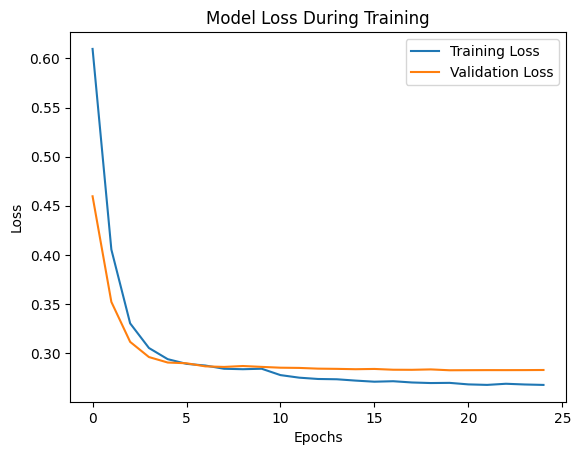

In [102]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Test the Results**

In [104]:
display(model.evaluate([user_vector_train_scaled, tourism_vector_train_scaled], y_train_scaled))  # train
display(model.evaluate([user_vector_val_scaled, tourism_vector_val_scaled], y_val_scaled))        # val
display(model.evaluate([user_vector_test_scaled, tourism_vector_test_scaled], y_test_scaled))     # test

230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2615 - root_mean_squared_error: 0.3106


[0.2633797526359558, 0.3129413425922394]

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2897 - root_mean_squared_error: 0.3425 


[0.28244829177856445, 0.331250935792923]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2894 - root_mean_squared_error: 0.3406


[0.28615257143974304, 0.33620700240135193]

## **Predict 1**

In [117]:
user_id = 5
city = 'Yogyakarta'

current_user_data = average_user_rating_df.loc[average_user_rating_df['User_Id'] == user_id, :].drop(columns='User_Id')
current_user_vecs = np.tile(current_user_data.to_numpy(), (len(tourism_df), 1))
scaled_current_user_vecs = user_scaler.transform(current_user_vecs)
print(scaled_current_user_vecs.shape)

tourism_vecs = tourism_one_hot_df.iloc[:, 1:].to_numpy()
scaled_tourism_vecs = tourism_scaler.transform(tourism_vecs)
print(scaled_tourism_vecs.shape)

display(current_user_data)

# make a prediction
y_p = model.predict([scaled_current_user_vecs, scaled_tourism_vecs])

# unscale y prediction
y_pu = target_scaler.inverse_transform(y_p)

# # sort the results, highest prediction first
sorted_index = np.argsort(-y_pu, axis=0).reshape(-1)  #negate to get largest rating first
sorted_ypu   = y_pu[sorted_index].reshape(-1)
sorted_items = tourism_vecs[sorted_index].reshape(-1) #using unscaled vectors for display

result = tourism_df.loc[sorted_index, ['Place_Name', 'Category', 'City']]
result['Rating_Prediction'] = sorted_ypu

(437, 9)
(437, 17)


,Bahari,Budaya,Cagar Alam,Kebun Binatang,Pusat Perbelanjaan,Situs Sejarah,Taman Hiburan,Teater & Pertunjukan,Tempat Ibadah
4,3.2,3.5,3.0,2.0,5.0,3.7,3.4,3.0,5.0


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
result.loc[result['City'] == city, :]

,Place_Name,Category,City,Rating_Prediction
105,Kawasan Malioboro,"Budaya, Situs Sejarah, Pusat Perbelanjaan",Yogyakarta,4.448390
100,Kampung Wisata Sosro Menduran,"Budaya, Situs Sejarah, Pusat Perbelanjaan",Yogyakarta,4.381581
134,Kawasan Wisata Sosrowijayan,Pusat Perbelanjaan,Yogyakarta,4.023228
173,Pasar Beringharjo,Pusat Perbelanjaan,Yogyakarta,3.982114
159,Pasar Kebon Empring Bintaran,Pusat Perbelanjaan,Yogyakarta,3.971991
...,...,...,...,...
177,Goa Pindul,Cagar Alam,Yogyakarta,2.726974
138,Puncak Gunung Api Purba - Nglanggeran,Cagar Alam,Yogyakarta,2.709998
119,Bukit Panguk Kediwung,"Taman Hiburan, Cagar Alam",Yogyakarta,2.707937
160,"Bukit Paralayang, Watugupit",Cagar Alam,Yogyakarta,2.674345


## **Predict 2**

In [107]:
def sq_dist(a,b):
    """
    Returns the squared distance between two vectors
    Args:
      a (ndarray (n,)): vector with n features
      b (ndarray (n,)): vector with n features
    Returns:
      d (float) : distance
    """
    d = np.sum(np.square(a - b))
    return d

In [108]:
# So here we just want to take (a kind of) embedding value from the Tourism NN which has dimensions of 32 (32 from exercise 1)
input_tourism_t = tf.keras.layers.Input(shape=(tourism_vector_train.shape[1],))  # input layer
vt_t = tourism_NN(input_tourism_t)
vt_t = L2NormalizeLayer(axis=1)(vt_t)  # incorporate normalization as was done in the original model
model_t = tf.keras.Model(input_tourism_t, vt_t)
model_t.summary()

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (None, 10)             │         3,562 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l2_normalize_layer_17           │ (None, 10)             │             0 │
│ (L2NormalizeLayer)              │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,562 (13.91 KB)

 Trainable params: 3,562 (13.91 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
tourism_vecs = tourism_one_hot_df.iloc[:, 1:].to_numpy()
scaled_tourism_vecs = tourism_scaler.transform(tourism_vecs)
vts = model_t.predict(scaled_tourism_vecs)
print(f"size of all predicted tourism feature vectors: {vts.shape}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
size of all predicted tourism feature vectors: (437, 10)


In [110]:
count = 50  # number of tourism to display
dim = len(vts)  # 437
dist = np.zeros((dim,dim))  # (327, 327)

for i in range(dim):
    for j in range(dim):
        dist[i,j] = sq_dist(vts[i, :], vts[j, :])

# t_dist = dist whose diagonal is closed, because the similarity value is definitely 1 (because the tourism is the same)
t_dist = np.ma.masked_array(dist, mask=np.identity(dist.shape[0]))  # mask the diagonal

In [111]:
tourism_vector_df.loc[5, 'Place_Id'].item()

312

In [112]:
# The point is to get the 1 most similar movie from each movie.
header = ["tourism1", "category1", "tourism2", "category2"]
disp = list()
for i in range(count):
    min_idx = np.argmin(t_dist[i])  # Get the index from the smallest similarity value in tourism i
    movie1_id = int(tourism_df.loc[i, 'Place_Id']) - 1  # Get index from tourism origin
    movie2_id = int(tourism_df.loc[min_idx, 'Place_Id']) - 1  # Get the index of the most similar tourism
    disp.append( [tourism_df.loc[movie1_id, 'Place_Name'], tourism_df.loc[movie1_id, 'Category'],
                  tourism_df.loc[movie2_id, 'Place_Name'], tourism_df.loc[movie2_id, 'Category']]
               )

disp_df = pd.DataFrame(disp, columns=header)
disp_df

,tourism1,category1,tourism2,category2
0,Monumen Nasional,"Budaya, Situs Sejarah",Monumen Selamat Datang,"Budaya, Situs Sejarah"
1,Kota Tua,Budaya,Museum Nasional,Budaya
2,Dunia Fantasi,"Taman Hiburan, Bahari",Kidzania,"Taman Hiburan, Bahari"
3,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Bumi Perkemahan Cibubur,Taman Hiburan
4,Atlantis Water Adventure,Taman Hiburan,Cibubur Garden Diary (Cibugary),Taman Hiburan
5,Taman Impian Jaya Ancol,"Taman Hiburan, Bahari",Taman Hiburan Rakyat,"Taman Hiburan, Bahari"
6,Kebun Binatang Ragunan,"Cagar Alam, Taman Hiburan",Taman Cattleya,"Taman Hiburan, Cagar Alam"
7,Ocean Ecopark,Taman Hiburan,SnowBay Waterpark,Taman Hiburan
8,Pelabuhan Marina,Bahari,Pulau Tidung,Bahari
9,Pulau Tidung,Bahari,Pelabuhan Marina,Bahari


## **Save Model**

In [113]:
# Save model to h5 file
model.save('content_based.h5')

In [114]:
# Check loaded model
new_model = tf.keras.models.load_model('content_based.h5')

In [115]:
# Check loaded model
display(new_model.evaluate([user_vector_train_scaled, tourism_vector_train_scaled], y_train_scaled))  # train
display(new_model.evaluate([user_vector_val_scaled, tourism_vector_val_scaled], y_val_scaled))        # val
display(new_model.evaluate([user_vector_test_scaled, tourism_vector_test_scaled], y_test_scaled))     # test

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2615 - root_mean_squared_error: 0.3106


[0.2633797526359558, 0.3129413425922394]

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2897 - root_mean_squared_error: 0.3425 


[0.28244829177856445, 0.331250935792923]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2894 - root_mean_squared_error: 0.3406


[0.28615257143974304, 0.33620700240135193]